In [ ]:
import keras
from keras import preprocessing
import matplotlib.pyplot as plt
import pandas as pd


## VGG16

In [ ]:
import keras
from keras import preprocessing

In [ ]:
dataGenerator = keras.preprocessing.image.ImageDataGenerator()
train = dataGenerator.flow_from_directory("/content/drive/MyDrive/MSBA_AI_FINAL/ieee-mbl-cls/train", class_mode='categorical', batch_size=32, target_size=(224, 224))
test= dataGenerator.flow_from_directory("/content/drive/MyDrive/MSBA_AI_FINAL/ieee-mbl-cls/val", class_mode='categorical', batch_size=32, target_size=(224, 224))

Found 6500 images belonging to 4 classes.
Found 724 images belonging to 4 classes.


In [ ]:
train

In [ ]:
from keras import applications
from keras.optimizers import SGD
from keras.layers import Dense

VGG16 = keras.models.Sequential()
VGG16.add(applications.VGG16(weights="imagenet", include_top=True))
VGG16.add(keras.layers.Dense(256, activation='relu'))
VGG16.add(keras.layers.Dense(128, activation='relu'))
VGG16.add(keras.layers.Dense(64, activation='relu'))
VGG16.add(keras.layers.Dense(4, activation='softmax'))

VGG16.compile(optimizer=SGD(learning_rate=.001),
                                              loss='categorical_crossentropy',
                                              metrics=['categorical_accuracy'])



553467096/553467096 [==============================] - 24s 0us/step


In [ ]:
modelHistory = VGG16.fit(train, epochs=5, validation_data=test)
#pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
#plt.show()

Epoch 1/5
204/204 [==============================] - 4405s 22s/step - loss: 0.9819 - categorical_accuracy: 0.6109 - val_loss: 0.9264 - val_categorical_accuracy: 0.7514
Epoch 2/5
204/204 [==============================] - 95s 464ms/step - loss: 0.7900 - categorical_accuracy: 0.8512 - val_loss: 0.7051 - val_categorical_accuracy: 0.8315
Epoch 3/5
204/204 [==============================] - 95s 463ms/step - loss: 0.4804 - categorical_accuracy: 0.9091 - val_loss: 0.3310 - val_categorical_accuracy: 0.9047
Epoch 4/5
204/204 [==============================] - 92s 449ms/step - loss: 0.2279 - categorical_accuracy: 0.9188 - val_loss: 0.1957 - val_categorical_accuracy: 0.9171
Epoch 5/5
204/204 [==============================] - 91s 446ms/step - loss: 0.1782 - categorical_accuracy: 0.9251 - val_loss: 0.1516 - val_categorical_accuracy: 0.9337


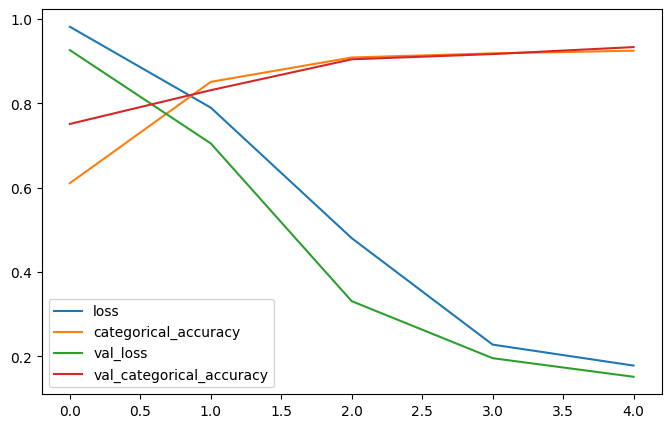

In [ ]:
pd.DataFrame(modelHistory.history).plot(figsize=(8,5))
plt.show()

The fact that loss is continuing to decrease indicated that I could have run this model for more epochs.